# Linear Models

Contents:
1. [Introduction](#1)
2. [Linear Regression](#2)
    1. [Modelling Non-linear Relationships](#2.1)
        1. [Engineering New Features](#2.1.1)
        2. [Polynomial Transformer](#2.1.2)
        3. [Support Vector Machine](#2.1.3)
        4. [Other Transformers](#2.1.4)
    2. [Regularisation](#2.2)
3. [Logistic Regression (Classification)](#3)
    1. [Regularisation](#3.1)
    2. [Non-linear Relationships](#3.2)
4. [Summary](#4)

<a id="1" ></a>
## Introduction

Linear models are __fast to train__ and are typically good baselines. They work under the assumption that the target variable can be approximated by a linear combination of the features (explanatory variables) + a final offset (the y intercept in a 2D environment). The learning process consists in estimating the optimal values of the coefficients of the linear combinations to minimize the average prediction error.

The best fit is represented by the blue line which minimizes the sum of the square differences between the predicted values and the values of the target variable represented by the red segments.

This minimization happens when we call the fit method of the `LinearRegression` class. The result is the automated tuning of the slope and intercept coefficient of the linear model.

<style>
h1 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
<table>
    <tr>
        <td> <h1>Linear Regression</h1></td>
        <td> <h1>Logistic Regression</h1></td>
    </tr>
    <tr>
        <td> <img src="diagrams/Linear%20Regression.jpg" width=400/></td> 
        <td> <img src="diagrams/Logistic%20Regression.jpg" width=400/></td>
    </tr>
</table>

For classification problems, the target _y_ is __binary__, and can be represented by either 1 or 0. With logistic regression, the output is modeled using a form of soft step function, adjusted to the data. This function is called a logistic function. Using a soft, graduate shift between y = 0 and y = 1 is useful to capture the grey zone, where the value of x is not enough to decide whether the target value is 0 (blue) or 1 (red) with high confidence.

The `LogisticRegression` estimator can natural be extended to support __multiclass classification__.

Instead of __predicting one number__ which can be interpreted as the probability of x being assigned class 1, the model nows __predicts 3 numbers__: the probabilities of x being either assigned class 0 (blue), 1 (orange) or 2 (green). Those three numbers must sum to 1.

The "true" value of y is one of those 3 possibilities. The class labels are exclusive.

Agains the trained models finds a way to define regions of the feature space, one for each class. The shape of the decision boundary are (segments) of __straight lines__ because Logistic Regression internally builds a __linear combination__ of the input features: it is a linear model.

<img src="diagrams/Logistic%20Regression%20Multiclass.jpg" width=600/>

<a id="2" ></a>
## Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
sklearn.set_config(display="diagram")

In [2]:
# load data
penguins = pd.read_csv("datasets/penguins_regression.csv")
# set one feature and target
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [3]:
from sklearn.linear_model import LinearRegression
# make and fit the model
linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [4]:
weight_flipper_length = linear_regression.coef_[0]
intercept_body_mass = linear_regression.intercept_

print(f'The equation generated is y = {weight_flipper_length:.2f}x {intercept_body_mass:.1f}')

The equation generated is y = 49.69x -5780.8


In [5]:
# get range of x values
flipper_length_range = np.linspace(data.min(), data.max(), num=300)
# calculate y values from derived weights
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

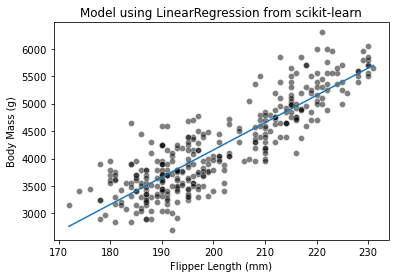

In [6]:
# plot actual data values
sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
# plot derived line of best fit
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [7]:
# metric for evaluation is the Mean Squared Error (MSE). The model aims to minimise this.
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


In [8]:
# another metric is the Mean Absolute Error, which is easier to interpret
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


A mean absolute error of 313 means that in average, our model make an error of +/- 313 grams when predicting the body mass of a penguin given its flipper length.

<a id="2.1" ></a>
## Non-linear Relationships

Linear Regression is not always suitable, for example if the relationship is non-linear. However there are methods to address this.

In [9]:
## create synthetic dataset
# seed
rng = np.random.RandomState(0)

# 100 samples
n_sample = 100
# range for x values
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
# add random noise
noise = rng.randn(n_sample) * .3
# plot synthetic y values: y = x^3 - 0.5x^2 + c
target = data ** 3 - 0.5 * data ** 2 + noise

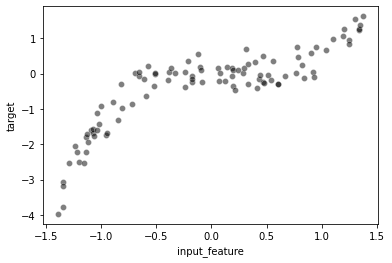

In [10]:
# add synthetic data to dataframe
full_data = pd.DataFrame({"input_feature": data, "target": target})

# plot synthetic data
_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

In [11]:
data.shape

(100,)

In [12]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

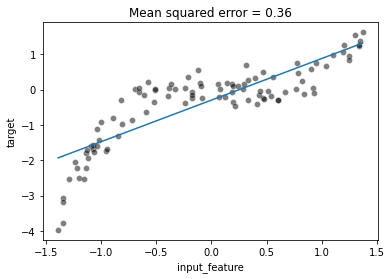

In [13]:
# regular linear regression:
linear_regression = LinearRegression()
# fit the model
linear_regression.fit(data, target)
# use fitted model to make predictions
target_predicted = linear_regression.predict(data)

# evaluate using MSE
mse = mean_squared_error(target, target_predicted)

# plot data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

As we can see, the model performs poorly. Here we could instead use a model like a Decision Tree Regressor which can handle non-linearity natively, but we also have some other options.

<a id="2.1.1" ></a>
### a) Engineer New Features

We could create new features, derived from the original features, using some expert knowledge. In this example, we know that we have a cubic and squared relationship between data and target (because we generated the data).

Indeed, we could create two new features (data ** 2 and data ** 3) using this information as follows. 

In [14]:
data.shape

(100, 1)

In [15]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
data_expanded.shape

(100, 3)

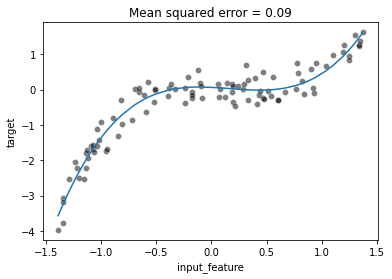

In [16]:
# refit the model
linear_regression.fit(data_expanded, target)
# get new predictions
target_predicted = linear_regression.predict(data_expanded)
# evaluate with MSE
mse = mean_squared_error(target, target_predicted)
# plot data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

<a id="2.1.2" ></a>
### b) Polynomial Transformer

Instead of manually creating new features, we can use a transformer to do this for us.

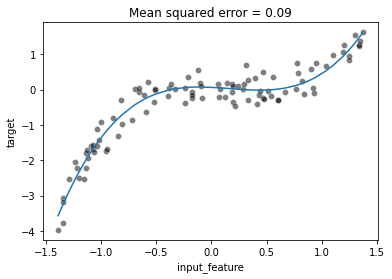

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# pass the transformer first
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
# fit the model
polynomial_regression.fit(data, target)
# use the fitted model to generate predictions
target_predicted = polynomial_regression.predict(data)
# evaulate using MSE
mse = mean_squared_error(target, target_predicted)
# plot original data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

<a id="2.1.3" ></a>
### c) Support Vector Machine

We can use a 'kernel'. Instead of learning a weight per feature as we previously emphasized, a weight will be assigned to each sample. However, not all samples will be used. This is the base of the support vector machine algorithm.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

For more information, check the [documentation](https://scikit-learn.org/stable/modules/svm.html).

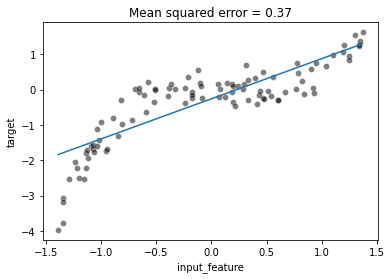

In [18]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
# fit the model
svr.fit(data, target)
# use the fitted model to generate predictions
target_predicted = svr.predict(data)
# evalutate using the MSE
mse = mean_squared_error(target, target_predicted)

# plot the data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot the predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

The predictions of our SVR with a linear kernel are all aligned on a straight line. SVR(kernel="linear") is indeed yet another example of a linear model.

However the estimator can also be configured to use a non-linear kernel. Then, it can learn a prediction function that computes non-linear interaction between samples for which we want to make a prediction and selected samples from the training set.

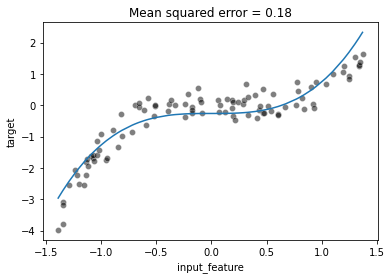

In [19]:
svr = SVR(kernel="poly", degree=3)
# fit the model
svr.fit(data, target)
# use the fitted model to generate predictions
target_predicted = svr.predict(data)
# evalutate using the MSE
mse = mean_squared_error(target, target_predicted)

# plot the data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot the predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Kernel methods such as SVR are very efficient for __small to medium datasets__.

For larger datasets with n_samples >> 10_000, it is often computationally more efficient to perform explicit feature expansion using PolynomialFeatures or other non-linear __transformers__ from scikit-learn such as `KBinsDiscretizer` or `Nystroem`.

<a id="2.1.4" ></a>
### d) Other Transformers

As mentioned, we can use other transformers to transform the data __before__ it is passed to the Logistic Regression model.

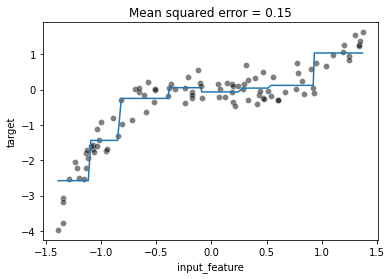

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8), LinearRegression(),
)
# fit the model
binned_regression.fit(data, target)
# use the fitted model to generate predictions
target_predicted = binned_regression.predict(data)
# evalutate using the MSE
mse = mean_squared_error(target, target_predicted)
# plot the data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot the predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

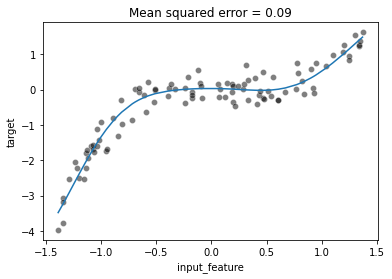

In [21]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5), LinearRegression(),
)
# fit the model
nystroem_regression.fit(data, target)
# generate predictions
target_predicted = nystroem_regression.predict(data)
# evalutate using the MSE
mse = mean_squared_error(target, target_predicted)
# plot the data
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
# plot the predictions
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

<a id="2.2" ></a>
## Regularisation

Regularisation is forcing large positive or negatives weights to shrink towards zero. We will first consider a model without regularisation.

In [22]:
# load data
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
from sklearn.model_selection import cross_validate

# pass PolynomialFeatures transformer to create additional features to encode non-linear feature interactions
linear_regression = make_pipeline(PolynomialFeatures(degree=2),
                                  LinearRegression())
# evaluate the model using MSE, ensuring the estimators and the train scores are also returned
cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [24]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4190.212 +/- 151.123


In [25]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
13334.944 +/- 20292.683


As the training score is significantly better, we can see that the model is overfitting.

In [26]:
# look at the first fold from the cross validation
model_first_fold = cv_results["estimator"][0]

# extract the new feature names + old
feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

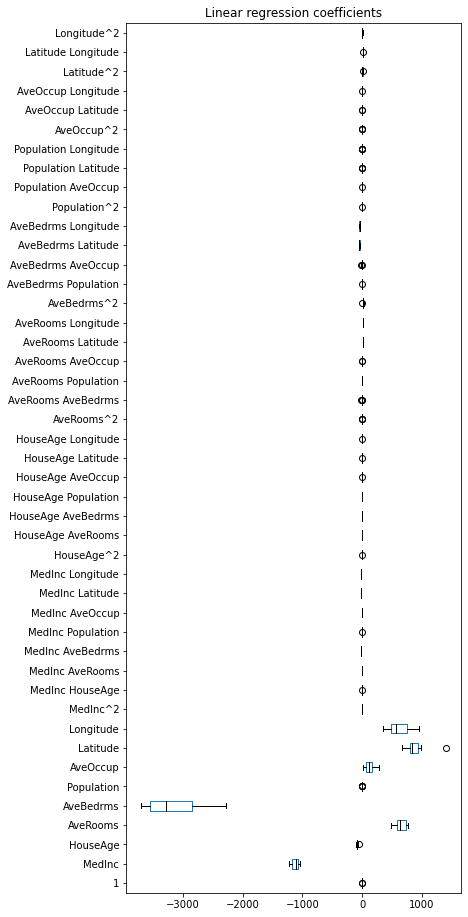

In [27]:
# extract coefficents
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
# combine info to a dataframe
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

# plot results
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

As there is a large discrepancy between the size of the weights, regularisation could be useful here to make the model consider all features more homogeneously.

In [28]:
from sklearn.linear_model import Ridge

# again passing the Polynomial Features transformer
ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
# evaluate results with MSE, returning estimators and train scores
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.672e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.67257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.75536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.67367e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgW

The code cell above will generate a couple of warnings because the features included both extremely large and extremely small values, which are causing numerical problems when training the predictive model.

In [29]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4373.180 +/- 153.942


In [30]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
7303.589 +/- 4950.732


As the test score is now closer to the train score, we can see that the model is overfitting less.

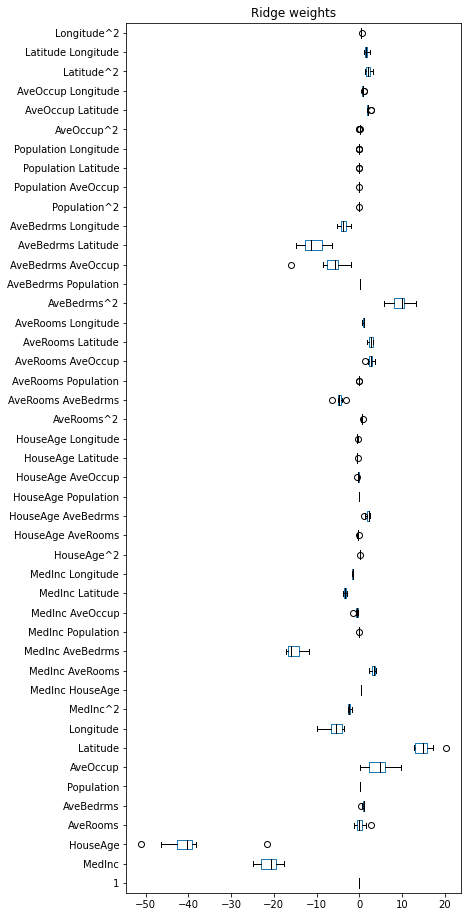

In [31]:
# extract coefficents
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
# combine info to a dataframe
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

# plot results
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

However this example still neglects __scaling__ the data and finding the best regularisation __parameter__.

In [32]:
from sklearn.preprocessing import StandardScaler

# same as before, but adding a scaling transformer
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=0.5))
# evaluate using MSE
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [33]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4347.036 +/- 156.666


In [34]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
5508.472 +/- 1816.642


The test score hs further improved, indicating the model is less overfitted. We will check the new weights.

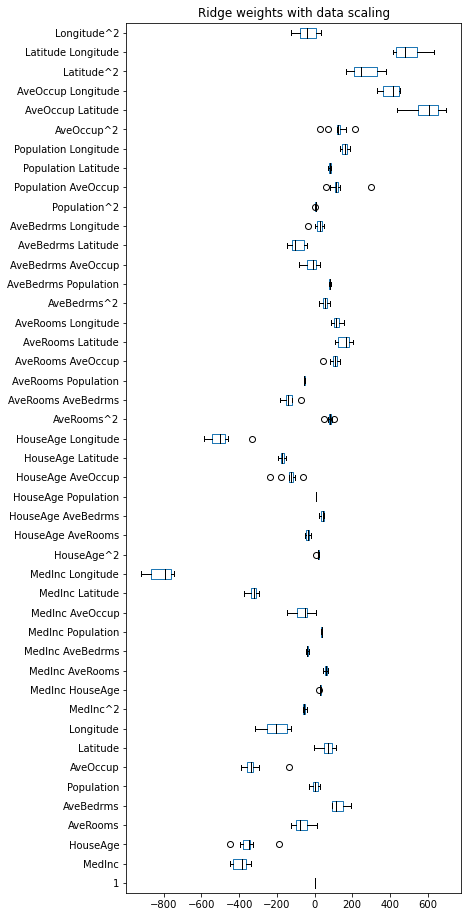

In [35]:
# extract weights
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
# combine to df
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

# plot results
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

We can see that now the weight magnitudes are closer and that all features are more equally contributing.

So far we have been using `alpha = 0.5`. We can increase this to increase the amount of regularisation, and shrink the weights closer to zero. To find the optimal value for `alpha`, we need to tune the model.

Note, model hyperparameter tuning should be done with care. Indeed, we want to find an optimal parameter that maximizes some metrics. Thus, it requires __both a training set and testing set__.

However, this testing set should be different from the out-of-sample testing set that we used to evaluate our model: if we use the same one, we are using an alpha which was optimized for this testing set and it breaks the out-of-sample rule.

Therefore, we should include search of the hyperparameter alpha within the cross-validation. We can use the `RidgeCV` predictor as the last step of the pipeline. Including the pipeline a cross-validation allows to make a __nested cross-validation__: the inner cross-validation will search for the best alpha, while the outer cross-validation will give an estimate of the testing score.

In [36]:
from sklearn.linear_model import RidgeCV

# create an array of values to search from
alphas = np.logspace(-2, 0, num=20)
# create the pipeline with the same Transformers as before, but using RidgeCV instead of Ridge to find the best alpha
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [37]:
np.logspace(-2, 0, num=20)

array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ])

In [38]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)

cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [39]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4306.562 +/- 25.918


In [40]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
4348.657 +/- 252.921


By optimizing `alpha`, we see that the training and testing scores are close. It indicates that our model is not overfitting.

When fitting the ridge regressor, we also requested to store the error found during cross-validation (by setting the parameter `store_cv_values=True`). We will plot the mean squared error for the different alphas regularization strength that we tried.

In [41]:
# extract alphas
mse_alphas = [est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]]
# combine to df (each column the value of alpha tried and the rows the resulting error in each fold)
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.010000,0.012743,0.016238,0.020691,0.026367,0.033598,0.042813,0.054556,0.069519,0.088587,0.112884,0.143845,0.183298,0.233572,0.297635,0.379269,0.483293,0.615848,0.784760,1.000000
0,7587.897141,7059.531216,6579.796667,6161.839629,5813.048345,5535.350138,5326.646369,5182.950517,5100.749049,5079.212663,5122.029454,5238.704149,5445.118890,5763.012259,6217.925433,6835.274126,7634.692137,8623.620241,9791.918443,11109.476019
1,7079.341771,6696.622046,6329.022308,5987.727181,5681.306000,5415.171818,5191.880969,5012.209177,4876.780585,4787.974274,4751.851652,4779.853646,4889.937328,5106.656625,5459.549144,5979.280717,6691.530974,7609.581815,8727.609953,10017.092899
2,24857.406605,21448.284772,18293.478416,15481.009011,13067.031991,11071.457116,9480.437579,8254.431555,7338.963939,6675.026438,6207.024331,5887.541169,5679.263698,5554.913823,5496.051755,5491.367683,5534.775517,5623.398006,5755.456140,5928.154410
3,7504.216958,7125.074257,6754.172985,6400.999897,6072.937966,5774.941819,5509.955509,5280.027720,5087.960263,4939.271829,4844.228092,4819.618117,4889.808854,5086.420585,5445.877349,6004.320850,6790.113763,7815.311733,9068.542918,10511.939341
4,6999.938808,6598.898743,6215.363499,5861.328579,5546.025773,5275.377052,5052.349007,4878.140850,4753.964890,4683.117084,4673.049960,4737.162496,4895.935124,5176.863333,5612.500529,6236.037942,7074.449338,8140.303978,9424.471281,10892.352852


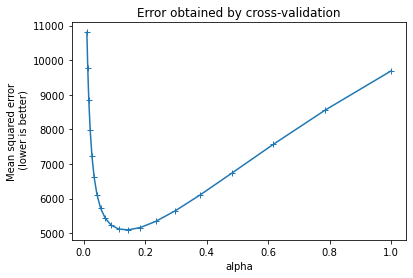

In [42]:
# plot results
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [43]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]

The optimal regularization strength is __not necessarily the same on all cross-validation iterations__. But since we expect each cross-validation resampling to stem from the same data distribution, it is common practice to use the average value of the best `alpha` found on different cross-validation folds as our final estimate for the tuned `alpha`.

In [44]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.17 +/- 0.11


<a id="3" ></a>
## Classification

In [45]:
penguins = pd.read_csv("datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

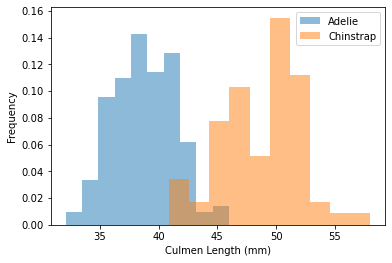

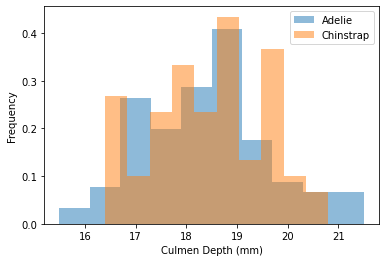

In [46]:
for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(
        alpha=0.5, density=True, legend=True)
    plt.xlabel(feature_name)

We have quite a simple problem. When the culmen length increases, the probability that the penguin is a Chinstrap is closer to 1. However, the culmen depth is not helpful for predicting the penguin species.

For model fitting, we will separate the target from the data and we will create a training and a testing set.

In [47]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

range_features = {
    feature_name: (penguins[feature_name].min() - 1,
                   penguins[feature_name].max() + 1)
    for feature_name in culmen_columns
}

In [48]:
from sklearn.linear_model import LogisticRegression

# Note we are NOT using regularisation by setting the parameter penalty to 'none'.
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 1.000


In [49]:
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu_r")

    return ax

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


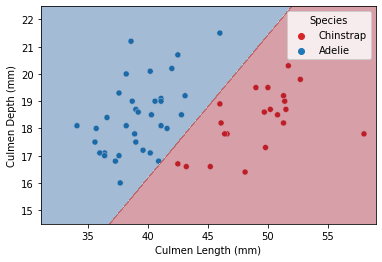

In [50]:
#scattergraph to show the data points
ax = sns.scatterplot(
    data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
# uses the function above to display the computed binary areas
_ = plot_decision_function(logistic_regression, range_features, ax=ax)

Since the line is oblique, it means that we used a combination of both features:

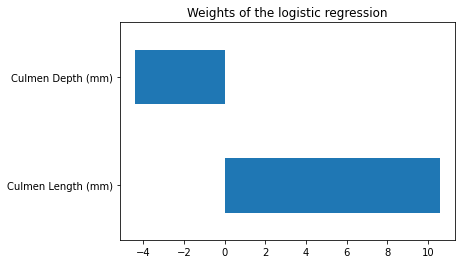

In [51]:
# extract the weights
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
# combine in a Series
weights = pd.Series(coefs, index=culmen_columns)
# plot results
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

<a id="3.1" ></a>
## Regularisation for Classification

Above we presented a __non-penalized logistic regression classifier__. This classifier accepts a parameter penalty to __add a regularization__. The regularization strength is set __using the parameter C__.

Here we will train a __l2-penalized logistic regression classifier__ to find the effect of the parameter C.

We will use the same train test split as in the previous code.

In [52]:
# new model allowing regularisation
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


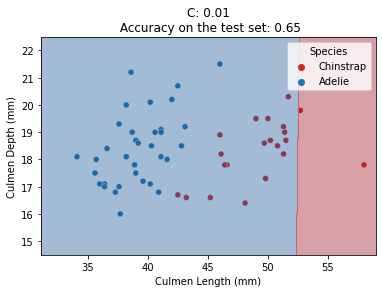

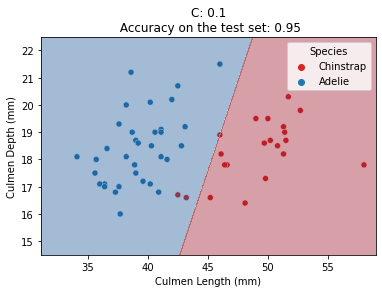

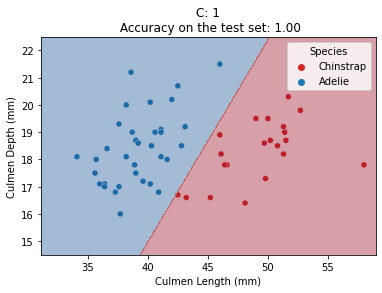

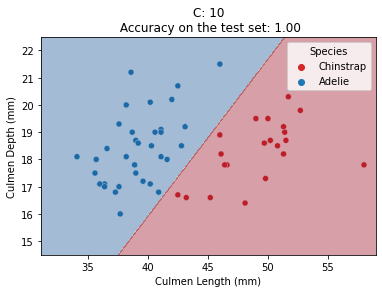

In [64]:
# list of C values to test
Cs = [0.01, 0.1, 1, 10]

# create empty list to add weight values to
weights_ridge = []

for C in Cs:
    # set the current value of C
    logistic_regression.set_params(logisticregression__C=C)
    # fit the model
    logistic_regression.fit(data_train, target_train)
    # retrieve the accuracy for current value of C
    accuracy = logistic_regression.score(data_test, target_test)
    # extract the weights for current value of C
    coefs = logistic_regression[-1].coef_[0]
    # add weights to Series
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))
    # plot the data
    plt.figure()
    ax = sns.scatterplot(
        data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
        hue=target_column, palette=["tab:red", "tab:blue"])
    # plot the decision boundary of the fitted model
    plot_decision_function(logistic_regression, range_features, ax=ax)
    plt.title(f"C: {C}\n Accuracy on the test set: {accuracy:.2f}")

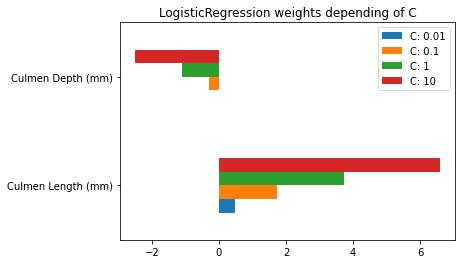

In [65]:
# add weights to df with values of C as column names
weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
# plot weights
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")

We see that a __small `C` will shrink the weights values toward zero. It means that a small `C` provides a more regularized__ model. Thus, `C` is the inverse of the `alpha` coefficient in the `Ridge` model.

Besides, with a strong penalty (i.e. small `C` value), the weight of the feature “Culmen Depth (mm)” is almost zero. It explains why the decision separation in the plot is almost perpendicular to the “Culmen Length (mm)” feature.

<a id="3.2" ></a>
## Non-linear Relationships for Classification

As we saw in the regression section, the linear classification model __expects the data to be linearly separable__. When this assumption does not hold, the model is not expressive enough to properly fit the data. Therefore, we need to apply the same tricks as in regression: 
- feature augmentation (potentially using expert-knowledge) 
- using a kernel-based method

We will explore two examples using a kernel-based method.

#### Example i

In [66]:
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])

data_moons, target_moons = moons[feature_names], moons[target_name]

range_features_moons = {"Feature #0": (-2, 2.5), "Feature #1": (-2, 2)}

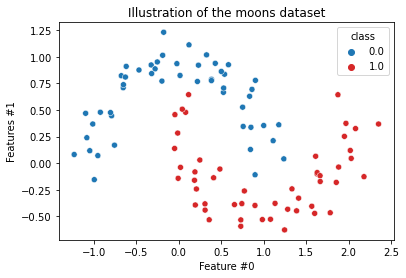

In [79]:
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                hue=target_moons, palette=["tab:blue", "tab:red"])
_ = plt.title("Illustration of the moons dataset")

We will create a predictive model by standardizing the dataset followed by a __linear__ support vector machine classifier.

Note also that __for simplicity we do not split into test and train sets__, but this is bad practice if wanting to asses performance.

In [69]:
from sklearn.svm import SVC

linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear"))
linear_model.fit(data_moons, target_moons)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


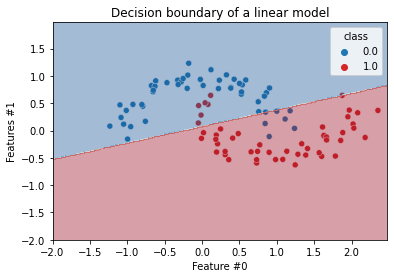

In [71]:
# plot data
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:blue", "tab:red"])
# plot decision boundary
plot_decision_function(linear_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary of a linear model")

#### Example ii

In [75]:
from sklearn.datasets import make_gaussian_quantiles

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=42)

gauss = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])

data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

range_features_gauss = {"Feature #0": (-4, 4), "Feature #1": (-4, 4)}

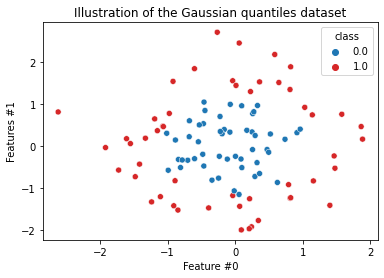

In [78]:
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:blue", "tab:red"])
_ = plt.title("Illustration of the Gaussian quantiles dataset")

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


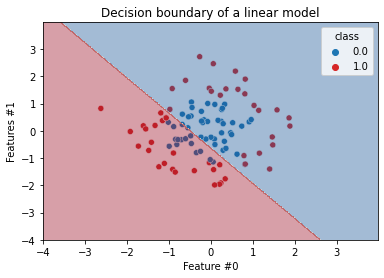

In [77]:
# using the same model with a linear kernel as before
linear_model.fit(data_gauss, target_gauss)
# plot data
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:blue", "tab:red"])
# plot decision boundary
plot_decision_function(linear_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary of a linear model")

### Solution:

In the section about linear regression, we saw that we could use several tricks to make a linear model more flexible by augmenting features or using a kernel. Here, we will use the later solution by using a __radial basis function (RBF) kernel__ together with a __support vector machine classifier__.

In [86]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5))

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


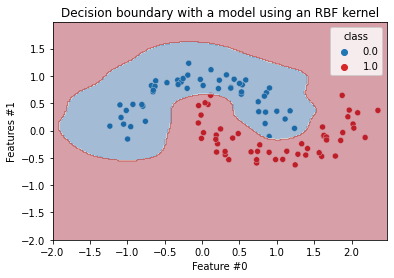

In [87]:
kernel_model.fit(data_moons, target_moons)
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:blue", "tab:red"])
plot_decision_function(kernel_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

C:\Users\GGN04\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


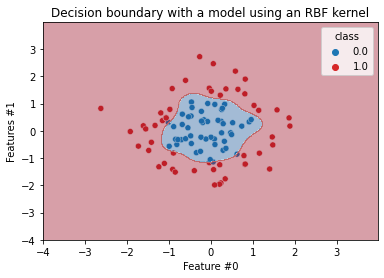

In [88]:
kernel_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:blue", "tab:red"])
plot_decision_function(kernel_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

We observe something similar than in the previous case. The decision function is more flexible and does not underfit anymore.

Thus, kernel trick or feature expansion are the tricks to make a linear classifier more expressive, exactly as we saw in regression.

Keep in mind that adding flexibility to a model can also __risk increasing overfitting by making the decision function to be sensitive to individual (possibly noisy) data points__ of the training set. Here we can observe that the decision functions remain smooth enough to preserve good generalization. If you repeat the above experiment with `gamma=100` and look at the decision functions you will see that the boundary areas are shrunk down almost to the specific training points.

<a id="4" ></a>
# Summary

- the predictions of a linear model depend on a weighted sum of the values of the input features added to an intercept parameter;

- fitting a linear model consists in adjusting both the weight coefficients and the intercept to minimize the prediction errors on the training set;

- to train linear models successfully it is __often required to scale__ the input features approximately to the same dynamic range;

- __regularization can be used to reduce over-fitting__: weight coefficients are constrained to stay small when fitting;

- the regularization hyperparameter needs to be fine-tuned by cross-validation for each new machine learning problem and dataset;

- linear models can be used on problems where the target variable is not linearly related to the input features but this requires __extra feature engineering work to transform the data__ in order to __avoid under-fitting__.